# Algorithmen der Bioinformatik I - Blatt 2

Autoren: Niklas Müller, Robin William Hundt

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import glob

def plot_hist(path):   
    dataFile = open(path, 'r')
    # expecting per line: viterbipath;probability
    lines = dataFile.readlines()
    probabilities = [line.split(';')[1] for line in lines]
    probabilities = [float(probabilities[i][:len(probabilities[i])]) for i in range(len(probabilities))]

    n, bins, patches = plt.hist(probabilities, density=True)

    plt.title("Histogram of Viterbi-probabilities")
    plt.xlabel('Viterbi-Probability')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.show()
    
    
def plot_roc(path):
    dataFile = open(path, 'r')
    # expecting: first line: true positive rate
                #second line: false positive rate
    lines = dataFile.readlines()

    TPR = lines[0][1:len(lines[0])-2].split(',')
    TPR = [float(x) for x in TPR]
    FPR = lines[1][1:len(lines[1])-2].split(',')
    FPR = [float(x) for x in FPR]

    auc = np.trapz(TPR, FPR)

    plt.title("ROC-Curve with AUC value:" + str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot(FPR, TPR)
    plt.axis([0.0, 1.0, 0.0, 1.0])
    plt.show() 


## HMM zum unehrlichen Casino
Die Implementation des Viterbialgorithmus für ein normales HMM befindet sich in der `bioalgosviterbi/src/main/java/viterbi/Viterbi` Datei.

#### Stimmt der berechnete Pfad mit dem aus der Abbildung überein?
Ja, die Pfade stimme überein.  
In der Datei `bioalgosviterbi/src/test/java/viterbi/ViterbiTest` befindet sich ein JUnit Test zur Überprüfung der Übereinstimmung des generierten Pfades mit dem aus "Biological sequence analysis" Seite 57.

#### Welche Möglichkeit gäbe es, die Unsicherheit des Modells an bestimmten Stellen der Sequenz weiter zu untersuchen?
Um die Unsicherheit des Modells an bestimmten Stellen zu untersuchen könnte die posterior probability $P(\pi_i=k|x)$ genutzt werden. Diese gibt an wie wahrscheinlich es ist, dass die Observation $x_i$ aus dem state $k$ emittiert wurde, gegeben der gesamten emittierten Sequenz $x$.  
Betrachtet man nun den Viterbipfad könnte für jeden state die posterior probabilty berechnet werden. Ist diese klein weist dies auf eine Stelle der Sequenz hin an denen sich das Modell unsicher sein könnte.

#### Skizzieren  Sie  einen  allgemeinen  Algorithmus  zur  Markierung  von Sequenzpositionen, an denen das Modell bezüglich der Rekonstruktion (“Vorhersage”) der Zustände möglicherweise unzuverlässig ist.

Sei $M_{vit}$ unser Viterbimodell, $x$ die Observationen

$\pi_{vit}$ = calc_vit_path($M_{vit}, x$)
  
for k in $\pi_{vit}$:  
>    post_p = calc $P(\pi_i=k|x)$  
>    if post_p < threshold:  
>>        mark k  

Die threshold Variable is ein Hyperparameter, welcher im Vorfeld sinnvoll gewählt werden muss.

#### Was müssten Sie bei der Implementation insbesondere beachten, um numerisch sinnvolle Ergebnisse zu erhalten?

Es muss beachtet werden, dass sowohl in der Implementation des Viterbialgorithmus als auch in der des Back-/Forwardalgorithmus mit logarithmierten Wahrscheinlichkeiten gerechnet wird. Andernfalls führt die häufige Multiplikation von werden $<1$ schnell zu Werten welche nicht mehr durch normale Gleitkommazahlen dargestellt werden können.

### Profil-HMM zur Erkenunng ribosomaler RNA-Sequenzen

### Schätzen der Modellparameter

#### Gibt es Regionen auf der 23S rRNA mit relativ geringer Entropie, also Regionen in denen bestimmte Buchstaben (Basen)  deutlich  häufiger  vorkommen  als  andere?

Diese gibt es in der Tat. Zum Beispiel haben die Positionen 3915 bis 4000 eine sehr geringen Entropie. Dies ist gut im folgenden Weblogo zu sehen, welches die relativen Häufigkeiten der einzelnen Positionen angibt, also je größer der Buchstabe dargestellt wird, desto häufiger kommt er vor.

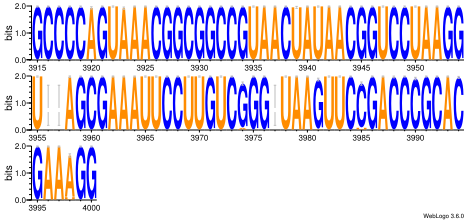

In [6]:
from IPython.display import SVG, display
SVG(filename='data/weblogoTrainingSequences3915-4000.svg')

#### Welche  Bedeutung haben  solche Regionen aus biologischer und statistischer Sicht?

In Regionen mit geringer Entropie sind die vorhandenen Zeichen (also hier Basen) über  die Sequenzen hinweg konserviert. Aus statistische Sicht ist dies ein Tief in der Informationsdichte. Wo weniger Variation in den gegebenen Daten vorhanden ist, kann auch schlechter auf die Informationen in den Daten geschlossen werden. Aus biologischer Sicht geben diese Regionen Aufschluss über funktionelle oder chemische Komponenten in der gegebenen Sequenz. Betrachtet man z. B. Sequenzen des gleichen Phylums, lässt dies vielleicht auf die Kodierung bestimmter Enzyme schließen.
Allerdings sind nicht alle Positionen des Multiplen-Sequenz-Alignments (der Trainingsdaten) so konserviert, und haben dadurch eine höhere Entropie:

In der ersten Grafik sieht man eine Regionen in der die Sequenzen weder konserviert sind, noch komplett willkürlich, bzw. zufällig auftreten.

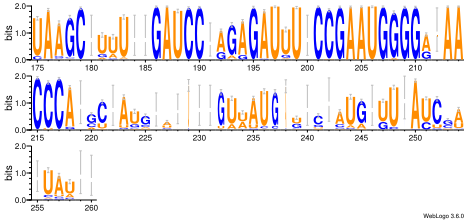

In [8]:
from IPython.display import SVG, display
SVG(filename='data/weblogoTrainingSequences175-260.svg')

In der nächsten Grafik sieht man eine Region in der 

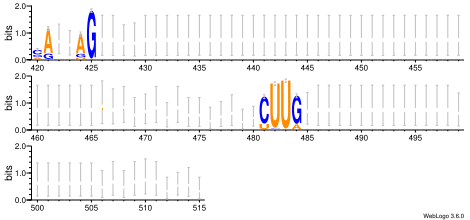

In [23]:
from IPython.display import SVG, display
SVG(filename='data/weblogoTrainingSequences420-515.svg')

### Anwendung auf Testsequenzen

#### Auf welcher taxonomichen Ebene des phylogenetischen Baums befindet sich das Phylum und was lässt sich über die Verwandtschaft von Organismen aus unterschiedlichen Phyla sagen?

#### Erzeugen Sie jeweils ein Histogramm der logarithmischen Scores für die 3 verschiedenen Testdateien.

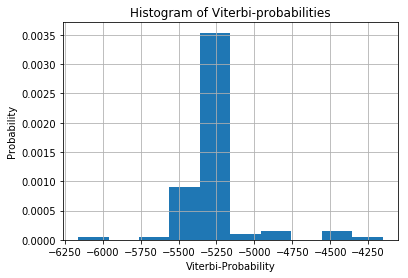

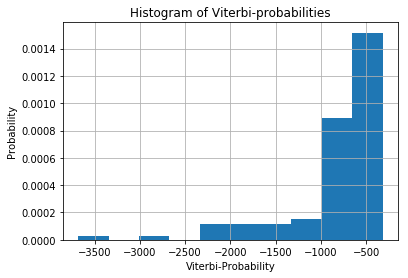

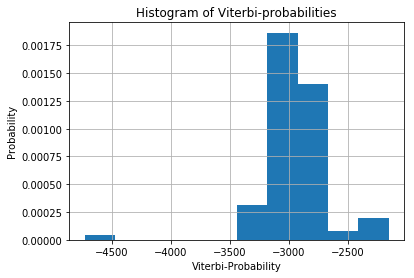

In [8]:
for path in glob.glob("data/test_files/*.fasta"):
    plot_hist(path)

#### Geben Sie ihre Vermutung ab, um welchen Typ es sich jeweils handelt (in jeder Datei sind nur Sequenzen eines Typs) und begründen Sie diese Vermutung.

#### Für jede Parameter-Konfiguration und jedes Phylum erzeugen Sie bitte eine ROC-Kurve und fügen diese ihrem Protokoll bei.

#### Setzen Sie nun die Emission-Pseudocounts auf 100 und die Transition-Pseudocounts (nur für Delete-Delete übergänge!) auf 200 (2 ROC-Kurven).

#### Was ist zu beobachten? Wieso ist es sinnvoll, die Delete-Delete Pseudocounts zu modifizieren bzw. warum lässt sich so die Performanz auf kurzen Fragmenten verbessern?

#### Geben Sie als letztes den Viterbi-Pfad der 100. Testsequenz in LSU_short_f.fasta für veränderte Transition-Pseudocounts (1, 50, 200) aus und vergleichen Sie die Ergebnisse. Was fällt auf?